# KBO data EDA

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import os
# from pathlib import Path

hit = pd.read_csv('2019_kbo_for_kaggle_v2.csv', encoding = 'cp949') # 작업파일과 데이터파일이 같은 폴더 안에 있으면 경로 설정 없이 이름만 쳐도 된다.
hit

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,tp,1B,FBP,avg,OBP,SLG,OPS,p_year,YAB,YOPS
0,백용환,24.0,26.0,58.0,52.0,4.0,9.0,4.0,0.0,0.0,...,포수,5.0,6.0,0.173,0.259,0.250,0.509,2014,79.0,0.580
1,백용환,25.0,47.0,86.0,79.0,8.0,14.0,2.0,0.0,4.0,...,포수,8.0,5.0,0.177,0.226,0.354,0.580,2015,154.0,0.784
2,백용환,26.0,65.0,177.0,154.0,22.0,36.0,6.0,0.0,10.0,...,포수,20.0,20.0,0.234,0.316,0.468,0.784,2016,174.0,0.581
3,백용환,27.0,80.0,199.0,174.0,12.0,34.0,7.0,0.0,4.0,...,포수,23.0,20.0,0.195,0.276,0.305,0.581,2017,17.0,0.476
4,백용환,28.0,15.0,20.0,17.0,2.0,3.0,0.0,0.0,0.0,...,포수,3.0,3.0,0.176,0.300,0.176,0.476,2018,47.0,0.691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,이원석,32.0,128.0,543.0,479.0,74.0,144.0,30.0,1.0,20.0,...,3루수,93.0,59.0,0.301,0.374,0.493,0.867,2019,395.0,0.768
1909,조용호,28.0,68.0,225.0,191.0,34.0,52.0,7.0,1.0,0.0,...,우익수,44.0,28.0,0.272,0.365,0.319,0.684,2018,13.0,0.154
1910,조용호,29.0,16.0,14.0,13.0,4.0,1.0,0.0,0.0,0.0,...,우익수,1.0,0.0,0.077,0.077,0.077,0.154,2019,188.0,0.720
1911,히메네스,27.0,70.0,299.0,279.0,37.0,87.0,17.0,2.0,11.0,...,3루수,57.0,16.0,0.312,0.344,0.505,0.849,2016,523.0,0.889


Lests look at all the columns avalible to us.

## feature 종류

In [3]:
hit.columns

Index(['batter_name', 'age', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'TB',
       'RBI', 'SB', 'CS', 'BB', 'HBP', 'GB', 'SO', 'GDP', 'BU', 'fly', 'year',
       'salary', 'war', 'year_born', 'hand2', 'cp', 'tp', '1B', 'FBP', 'avg',
       'OBP', 'SLG', 'OPS', 'p_year', 'YAB', 'YOPS'],
      dtype='object')

37개의 features

### 결측치 파악

In [4]:
hit.isnull().sum()

batter_name     0
age             0
G               0
PA              0
AB              0
R               0
H               0
2B              0
3B              0
HR              0
TB              0
RBI             0
SB              0
CS              0
BB              0
HBP             0
GB              0
SO              0
GDP             0
BU              0
fly             0
year            0
salary          0
war             0
year_born       0
hand2           0
cp              0
tp              0
1B              0
FBP             0
avg            14
OBP            12
SLG            14
OPS            14
p_year          0
YAB             0
YOPS           15
dtype: int64

In [5]:
#결측치가 존재하는 항은 제거해 주자
hit = hit.dropna()
hit.isnull().sum()

batter_name    0
age            0
G              0
PA             0
AB             0
R              0
H              0
2B             0
3B             0
HR             0
TB             0
RBI            0
SB             0
CS             0
BB             0
HBP            0
GB             0
SO             0
GDP            0
BU             0
fly            0
year           0
salary         0
war            0
year_born      0
hand2          0
cp             0
tp             0
1B             0
FBP            0
avg            0
OBP            0
SLG            0
OPS            0
p_year         0
YAB            0
YOPS           0
dtype: int64

### 불필요 feature 제거
- year_born : 선수 출생일, age(나이) 데이터가 있으므로 중복으로 여겨짐
- cp : 최근 포지션, tp(통합 포지션) 데이터가 있으므로 중복으로 여겨짐
- p_year, YAB, YOPS : 왼쪽부터 다음 시즌 년도, 다음 시즌 타석 수, 다음 시즌 OPS

불필요한 내용들로 간주, 제거

In [6]:
#제거코드
hit.drop(['year_born','cp','p_year','YAB','YOPS'], axis = 1)

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,salary,war,hand2,tp,1B,FBP,avg,OBP,SLG,OPS
0,백용환,24.0,26.0,58.0,52.0,4.0,9.0,4.0,0.0,0.0,...,2500,-0.055,우투우타,포수,5.0,6.0,0.173,0.259,0.250,0.509
1,백용환,25.0,47.0,86.0,79.0,8.0,14.0,2.0,0.0,4.0,...,2900,-0.441,우투우타,포수,8.0,5.0,0.177,0.226,0.354,0.580
2,백용환,26.0,65.0,177.0,154.0,22.0,36.0,6.0,0.0,10.0,...,6000,0.783,우투우타,포수,20.0,20.0,0.234,0.316,0.468,0.784
3,백용환,27.0,80.0,199.0,174.0,12.0,34.0,7.0,0.0,4.0,...,6000,-0.405,우투우타,포수,23.0,20.0,0.195,0.276,0.305,0.581
4,백용환,28.0,15.0,20.0,17.0,2.0,3.0,0.0,0.0,0.0,...,5500,-0.130,우투우타,포수,3.0,3.0,0.176,0.300,0.176,0.476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,이원석,32.0,128.0,543.0,479.0,74.0,144.0,30.0,1.0,20.0,...,30000,3.315,우투우타,3루수,93.0,59.0,0.301,0.374,0.493,0.867
1909,조용호,28.0,68.0,225.0,191.0,34.0,52.0,7.0,1.0,0.0,...,3100,0.215,우투좌타,우익수,44.0,28.0,0.272,0.365,0.319,0.684
1910,조용호,29.0,16.0,14.0,13.0,4.0,1.0,0.0,0.0,0.0,...,6200,-0.271,우투좌타,우익수,1.0,0.0,0.077,0.077,0.077,0.154
1911,히메네스,27.0,70.0,299.0,279.0,37.0,87.0,17.0,2.0,11.0,...,50000,2.365,우투우타,3루수,57.0,16.0,0.312,0.344,0.505,0.849


### Top salary

In [7]:
topSals = hit.sort_values(by = ['salary'], ascending  = False)
topSals['salary']

1338    250000
1339    250000
1684    160000
1683    160000
1685    160000
         ...  
1188      1800
1211      1800
1475      1700
1490      1700
1491      1700
Name: salary, Length: 1885, dtype: int64

### 선수 기량 평가 지수
* Batting Average (avg) - 타율
* On-base Plus Slugging (OPS) - 출루율 + 장타력(공격점수) 
* Wins Above Replacement (WAR) - 공격점수 + 수비점수

이중 가장 연봉과 관련있는 지표를 찾아보자

### 타율과 연봉의 상관관계

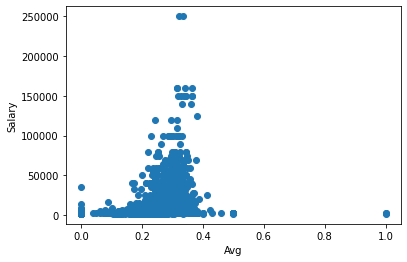

In [8]:
plt.scatter(x = hit['avg'], y = hit['salary'])
plt.xlabel('Avg')
plt.ylabel('Salary')
plt.show()

선수들의 타율은 주로 0.2 ~0.4에 분포하고 있으며, 이 사에에선 같은 타율이라도 연봉이 천차만별이다. 타율과 연봉은 크게 상관이 없는듯해 보인다.

### OPS(공격점수)와 연봉의 상관관계

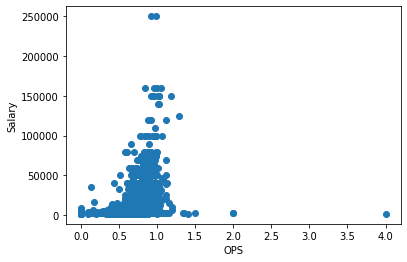

In [9]:
plt.scatter(x = hit['OPS'], y = hit['salary'])
plt.xlabel('OPS')
plt.ylabel('Salary')
plt.show()

OPS = OBP(출루율) + SLG(장타율)

주로 0.5 ~ 1.0 사이에 분포한다. 이 또한 연봉과 밀접하게 관련이 없어보인다.

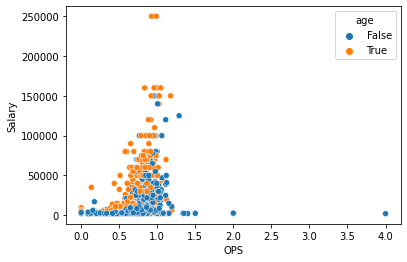

In [10]:
sns.scatterplot(x = hit['OPS'], y = hit['salary'], hue = hit['age']>30)
plt.xlabel('OPS')
plt.ylabel('Salary')
plt.show()

30세 이상의 선수들이 같은 OPS 수치인 젊은 선수 대비 더 많은 연봉을 받는다. - 짬대우? 더 두터운 팬층 보유로 인한 advantage?

### WAR(대체 선수 대비 승리 기여도)와 연봉의 상관관계

#### 특징
WAR은 한 선수가 기록한 전 종목의 성적을 바탕으로 계산되며, 물론 선수의 포지션에 따라, 그리고 해당 년도의 상황까지도 포함한다. 리그와 구장에 의한 요소마저도 보정한다. 그래서 포지션에 상관없이 선수 비교가 가능해져 WAR을 자주 사용한다

#### 한계
전반적으로 타자의 WAR가 투수보다 수치가 더 높게 나온다. 

포지션에 따른 수비 WAR보정을 하는데 유격수는 7.5의 가중치를 주고 1루수는 –12.5를 사용하는데 이것이 합리적인가에 대한 의견도 있고, 불펜투수와 선발투수의 WAR 차이, 포수의 프레이밍이나 투수리드 능력, 주장으로 선수를 아우르는 팀 케미스트리 부분 또한 평가할 수 없는 한계를 지니고 있다. 그렇기 때문에 WAR을 믿지 않는 사람들도 있다


<AxesSubplot:xlabel='war', ylabel='salary'>

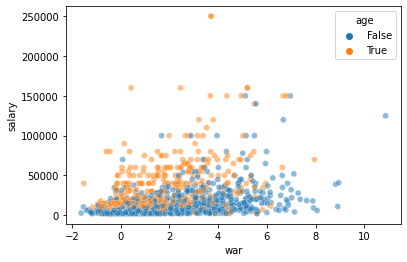

In [11]:
sns.scatterplot(x = hit['war'], y = hit['salary'], hue = hit['age']>30, alpha = 0.5)

WAR과 연봉은 아무 상관관계가 없다는 것을 알 수 있다.

## 좌타자 우타자 연봉 비교

야구계에서는 좌타자가 우타자에 비해 1루에 가깝게 서 있어 진루에 유리하고, 투수들도 좌타자를 더 까다로워 한다는 속설이 있다. 그렇다면 좌타자는 우타자보다 연봉을 많이 받을까?

먼저 좌타자와 우타자의 연봉을 비교해 보기로 했다.

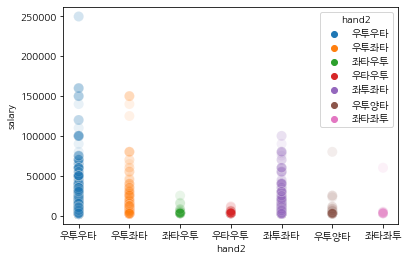

In [12]:
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm
import platform

# Scatter plot by Groups
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

sns.scatterplot(x='hand2', 

                y='salary', 

                hue='hand2', # different colors by group

                s=100, # marker size
                
                alpha = 0.1,

                data=hit)

plt.show()

해당 그래프로는 좌타자와 우타자의 연봉 차이가 명확히 보이지 않았다. 따라서 우투우타, 우타우투는 우타자, 나머지는 좌타자, (양손타자는 별개로 인덱싱)로 인덱싱하는 컬럼을 추가한 뒤 각각의 연봉 평균을 비교해보기로 했다.

#### 칼럼 추가하기(right_hand 칼럼 추가)
우타자는 우타자끼리, 좌타자는 좌타자끼리 나누었다. 양타자는 따로 인덱싱해 주었다.

In [13]:
#우투우타, 우타우투 = 1, 나머지 = 0로 인덱싱(우타 = 1, 좌타 = 0)
hit['Right_hand'] = (hit['hand2']=='우투우타') | (hit['hand2']=='우타우투') #만약 우투우타 혹은 우타우투면 true, 나머지는 false로 인덱싱
hit["Right_hand"] = hit["Right_hand"].astype(np.int64) #t/f값을 1/0값으로 변경

#양타 = 2
hit.loc[hit['hand2'] == '우투양타', 'Right_hand'] = 2 #만약 hand2 == 우투양타, right_hand = 2로 변경

hit

/tmp/ipykernel_149/3743550577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hit['Right_hand'] = (hit['hand2']=='우투우타') | (hit['hand2']=='우타우투') #만약 우투우타 혹은 우타우투면 true, 나머지는 false로 인덱싱
/tmp/ipykernel_149/3743550577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hit["Right_hand"] = hit["Right_hand"].astype(np.int64) #t/f값을 1/0값으로 변경
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,1B,FBP,avg,OBP,SLG,OPS,p_year,YAB,YOPS,Right_hand
0,백용환,24.0,26.0,58.0,52.0,4.0,9.0,4.0,0.0,0.0,...,5.0,6.0,0.173,0.259,0.250,0.509,2014,79.0,0.580,1
1,백용환,25.0,47.0,86.0,79.0,8.0,14.0,2.0,0.0,4.0,...,8.0,5.0,0.177,0.226,0.354,0.580,2015,154.0,0.784,1
2,백용환,26.0,65.0,177.0,154.0,22.0,36.0,6.0,0.0,10.0,...,20.0,20.0,0.234,0.316,0.468,0.784,2016,174.0,0.581,1
3,백용환,27.0,80.0,199.0,174.0,12.0,34.0,7.0,0.0,4.0,...,23.0,20.0,0.195,0.276,0.305,0.581,2017,17.0,0.476,1
4,백용환,28.0,15.0,20.0,17.0,2.0,3.0,0.0,0.0,0.0,...,3.0,3.0,0.176,0.300,0.176,0.476,2018,47.0,0.691,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,이원석,32.0,128.0,543.0,479.0,74.0,144.0,30.0,1.0,20.0,...,93.0,59.0,0.301,0.374,0.493,0.867,2019,395.0,0.768,1
1909,조용호,28.0,68.0,225.0,191.0,34.0,52.0,7.0,1.0,0.0,...,44.0,28.0,0.272,0.365,0.319,0.684,2018,13.0,0.154,0
1910,조용호,29.0,16.0,14.0,13.0,4.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.077,0.077,0.077,0.154,2019,188.0,0.720,0
1911,히메네스,27.0,70.0,299.0,279.0,37.0,87.0,17.0,2.0,11.0,...,57.0,16.0,0.312,0.344,0.505,0.849,2016,523.0,0.889,1


In [14]:
# 좌타자와 우타자, 그리고 양타자 수 비교
hit['Right_hand'].value_counts()

1    1225
0     623
2      37
Name: Right_hand, dtype: int64

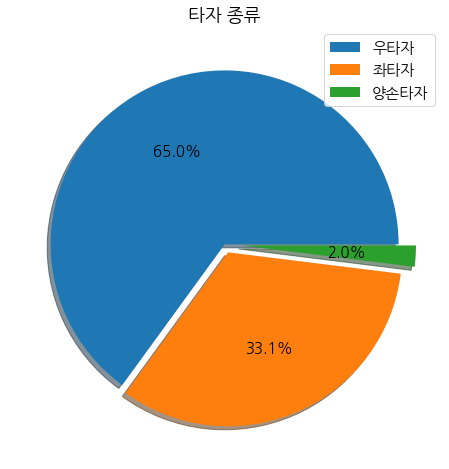

In [15]:
#시각화
temp = hit['Right_hand'].value_counts()
counts = []
for i in temp:
    counts.append(i)

explode = [0, 0.05, 0.1]

plt.figure(figsize = (8,8))
plt.rc('font', size=15)
plt.pie(counts, autopct='%.1f%%', explode = explode, shadow=True)
plt.legend(['우타자','좌타자','양손타자'])
plt.title('타자 종류')
plt.show()

보다시피 1(우타자)가 0(좌타자)보다 2배 가량 많은 것으로 보인다. 또 양손을 다 쓸 수 있는 양타자는 37명으로, 매우 극소수로 파악되었다.

좌타자가 KBO계에서 적은 편에 속한다는 사실을 알 수 있었다. 투수들이 좌타자를 까다로워하는 이유도 상대적으로 좌타자를 마주칠 경험이 적기 때문인 것으로 사려된다.

이제 우타자와 좌타자, 양타자의 연봉 평균을 비교해 보자

In [16]:
hit_salary = hit.groupby(['Right_hand'], as_index=False).mean()
hit_salary['salary']

0    14562.030498
1    14330.995918
2     7778.378378
Name: salary, dtype: float64

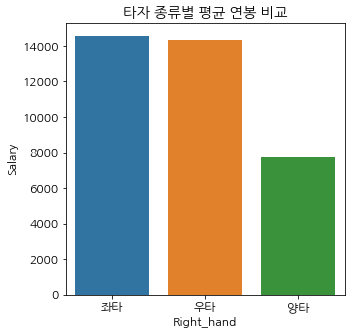

In [17]:
#시각화
plt.figure(figsize = (5,5))
plt.rc('font', size=12)
sns.barplot(x = ['좌타','우타','양타'], y =  hit_salary["salary"])
plt.title('타자 종류별 평균 연봉 비교')
plt.xlabel('Right_hand')
plt.ylabel('Salary')
plt.show()


좌타자와 우타자의 연봉 평균을 내 보았다.

좌타자가 우타자에 비해 조금 더 높은 평균 연봉을 가지는 것을 알 수 있었다. 그러나 큰 차이는 발견되지 않았다.

양손타자는 그 활용도만 보면 굉장히 높은 연봉을 받아야할 것 같은데 상대적으로 적은 연봉 평균치를 보였다. 


### 가설 : 양손타자는 과거에 많이 존재했기 때문에, 물가가 상대적으로 낮은 시기에 연봉이 정해져 평균 연봉이 낮게 책정된다.
혹시나 양손타자(스위치히터)들의 활동기간이 일러서, 낮은 물가 때문에 연봉 평균이 낮은가? 확인해보자

In [18]:
#(양타자들 연도 최솟값, 최댓값 파악 코드)
hit_both = hit[['year','Right_hand']] # 원 데이터에서 필요한 데이터 열만 가져오기

idx = hit[(hit['Right_hand'] == 0) | (hit['Right_hand'] == 1)].index #righthand == 0 or 1 인 행들의 인덱스 모으기


hit_both = hit_both.drop(idx) #idx 인덱스의 행 떨구기



print("데이터 내 양타자가 처음으로 등장한 년도 :",hit_both['year'].min())
print("데이터 내 양타자가 마지막으로 등장한 년도 :",hit_both['year'].max())


데이터 내 양타자가 처음으로 등장한 년도 : 2004
데이터 내 양타자가 마지막으로 등장한 년도 : 2018


<AxesSubplot:xlabel='Right_hand', ylabel='year'>

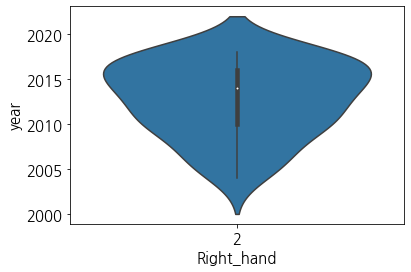

In [19]:
# 양손타자들의 등장 년도 분포 확인
plt.rc('font', size=15)
sns.violinplot(y = hit_both['year'], x = hit_both['Right_hand'])

아니였다. 양손타자들은 꾸준히, 그 중에서도 최근 5년 전 가장 많이 등장해 왔다. 이로서 과거의 낮은 물가로 인해 연봉이 낮게 책정되었다는 가설은 거짓으로 판명되었다.

## 좌타자, 우타자들의 1루타 횟수 비교(1B)
좌타자는 우타자에 비해 1루에 1걸음~1걸음 반정도 가깝고, 스윙 궤적도 우타자와는 반대로 1루쪽으로 몸이 돌아가, 타격 시 1루 진루에 유리하다는 속설이 있다. 이를 검증해 보자. 

In [20]:
hit_1b = hit.groupby(['Right_hand'], as_index=False).mean() #좌타,우타 양타별 1루타 횟수 평균내기
hit_1b['1B']

0    52.290530
1    43.266122
2    24.027027
Name: 1B, dtype: float64

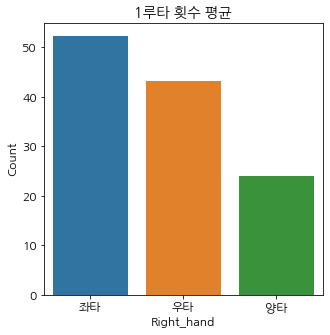

In [21]:
#시각화
plt.figure(figsize = (5,5))
plt.rc('font', size=12)
sns.barplot(x = ['좌타','우타','양타'], y =  hit_1b["1B"])
plt.title('1루타 횟수 평균')
plt.xlabel('Right_hand')
plt.ylabel('Count')
plt.show()

좌타자의 경우 평균 1루타 횟수 52회, 우타자의 경우 평균 1루타 횟수 43회로 좌타자가 우타자에 비해 1루타 횟수가 훨씬 많은 것을 알 수 있었다. 이로서 좌타자가 우타자에 비해 1루 진출에 유리하다는 가설은 참이다.

## 좌타자는 도루에 유리한가?  (SB = 도루성공수)
주자가 직접 베이스 진출에 성공한 횟수도 좌타자가 우타자에 비해 많을까?

In [22]:
hit_sb = hit.groupby(['Right_hand'], as_index=False).mean() #좌타,우타 양타별 도루 성공수 평균내기
hit_sb['SB']

0    8.410915
1    4.518367
2    3.216216
Name: SB, dtype: float64

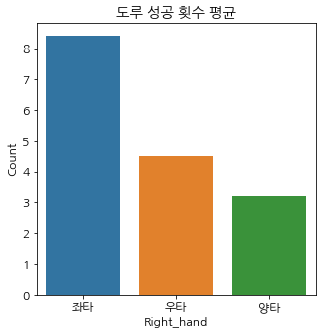

In [23]:
#시각화
plt.figure(figsize = (5,5))
plt.rc('font', size=12)
sns.barplot(x = ['좌타','우타','양타'], y =  hit_sb["SB"])
plt.title('도루 성공 횟수 평균')
plt.xlabel('Right_hand')
plt.ylabel('Count')
plt.show()



보다시피, 도루 성공 횟수 지표인 SB는 좌타자가 우타자에 비해 2배 이상 높았다. (최대최소 편차 5.2회 정도)좌타자가 우타자보다 도루에 훨씬 유리하다는 것을 데이터에서 증명해 냈다.

### 도루 실패수 척도 CS도 확인해 보자

In [24]:
hit_cs = hit.groupby(['Right_hand'], as_index=False).mean()
hit_cs['CS']

0    3.407705
1    2.208163
2    2.027027
Name: CS, dtype: float64

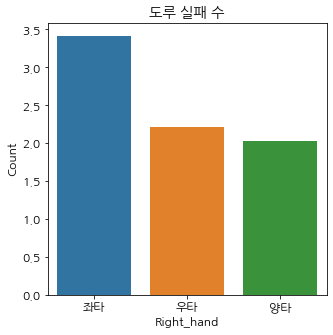

In [25]:
#시각화
plt.figure(figsize = (5,5))
plt.rc('font', size=12)
sns.barplot(x = ['좌타','우타','양타'], y =  hit_cs["CS"])
plt.title('도루 실패 수')
plt.xlabel('Right_hand')
plt.ylabel('Count')
plt.show()

도루 실패수 평균 또한 좌타자가 가장 많고, 우타자, 양손타자 순으로 작아졌다. 다만 성공 수에 비해 편차가 그닥 크지 않았다.(최대최소 편차 1.4회 정도) 

### 도루  성공률 계산해보기

선수별 도루 성공률 컬럼 추가 - 도루 성공률 공식 : 도루 성공횟수/(도루 성공횟수 + 도루 실패횟수)

In [26]:
# 원 데이터에서 필요한 컬럼만 가져오기
hit_sbr = hit[['Right_hand','SB', 'CS']]

#도루 성공률 컬럼 SB%추가

hit_sbr['SB%'] = hit_sbr['SB']/(hit_sbr['SB'] + hit_sbr['CS'])
hit_sbr

/tmp/ipykernel_149/2185328068.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hit_sbr['SB%'] = hit_sbr['SB']/(hit_sbr['SB'] + hit_sbr['CS'])


,Right_hand,SB,CS,SB%
0,1,0.0,0.0,NaN
1,1,0.0,0.0,NaN
2,1,3.0,1.0,0.750000
3,1,2.0,1.0,0.666667
4,1,0.0,0.0,NaN
...,...,...,...,...
1908,1,2.0,1.0,0.666667
1909,0,11.0,2.0,0.846154
1910,0,0.0,1.0,0.000000
1911,1,8.0,2.0,0.800000


#### NaN값 처리하기
NaN은 주로 도루 성공횟수, 실패횟수 모두 0인 선수들 즉 시즌간 도루를 단 한번도 시도해 보지 않은 선수들을 의미한다. 처리를 어떻게 해야할까?

일단 NaN값이 얼마나 있는지 확인해 보자

In [27]:
hit_sbr.isnull().sum()

Right_hand      0
SB              0
CS              0
SB%           400
dtype: int64

400명 정도의 선수가 도루를 시도하지 않았다. 일단 해당 선수들은 평균 계산에서 빼도록 하자.(더 좋은 방법 있을까? 0으로 두는 방법은 별로인가?)

In [28]:
#nan값 제거
hit_sbr = hit_sbr.dropna()
hit_sbr.isnull().sum()

Right_hand    0
SB            0
CS            0
SB%           0
dtype: int64

In [29]:
hit_sbr

,Right_hand,SB,CS,SB%
2,1,3.0,1.0,0.750000
3,1,2.0,1.0,0.666667
5,1,0.0,1.0,0.000000
8,0,1.0,1.0,0.500000
9,0,3.0,3.0,0.500000
...,...,...,...,...
1908,1,2.0,1.0,0.666667
1909,0,11.0,2.0,0.846154
1910,0,0.0,1.0,0.000000
1911,1,8.0,2.0,0.800000


In [30]:
# Right hand로 그룹핑하고, 내부에서 평균 내자
hit_sbr = hit_sbr.groupby(['Right_hand'], as_index=False).mean()
# hit_sbr['SB%']
hit_sbr

,Right_hand,SB,CS,SB%
0,0,9.980952,4.043810,0.631311
1,1,5.919786,2.893048,0.615246
2,2,4.760000,3.000000,0.629383


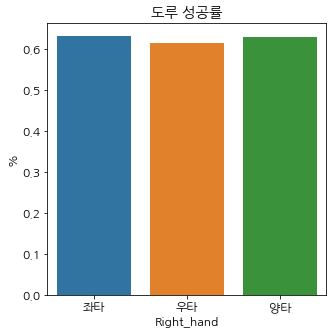

In [31]:
#시각화
plt.figure(figsize = (5,5))
plt.rc('font', size=12)
sns.barplot(x = ['좌타','우타','양타'], y =  hit_sbr["SB%"])
plt.title('도루 성공률')
plt.xlabel('Right_hand')
plt.ylabel('%')
plt.show()

Nan값 선수들을 제거해서, 기존에 파악했던 SB,CS 평균치와 약간의 차이가 발생했다.

SB% 결과를 살펴보면, 좌타자가 도루 성공률 63%로 가장 높았고, 우타자가 61%로 가장 낮았다. 큰 차이는 없는 것으로 파악된다.

### 좌타자, 우타자의 OBP (출루율) 확인
타격을 통한 출루 + 도루 + 볼넷 + 몸에 맞는 공 등 모든 출루를 총 망라하는 지표이다. 이또한 좌타자가 더 유리할까?

In [32]:
hit_obp = hit.groupby(['Right_hand'], as_index=False).mean()
hit_obp['OBP']

0    0.329380
1    0.313130
2    0.266351
Name: OBP, dtype: float64

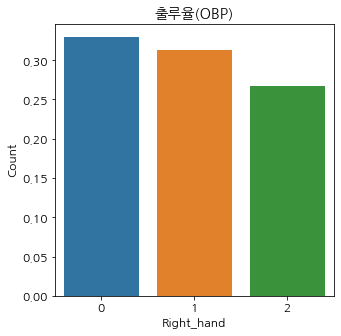

In [33]:
#시각화
plt.figure(figsize = (5,5))
plt.rc('font', size=12)
sns.barplot(x = [0,1,2], y =  hit_obp["OBP"])
plt.title("출루율(OBP)")
plt.xlabel('Right_hand')
plt.ylabel('Count')
plt.show()

좌타자들의 평균 출루율이 가장 높긴 했지만, 도루 지표보다는 크게 차이가 나지 않았다. 타격점수, 볼넷 등의 지표로 인해 보정이 된 듯 하다.

### 좌타자, 우타자의 HBP (몸에 맞은 공 = 데드볼 횟수) 확인
좌타자, 우타자 중 누가 더 공에 많이 맞을까?

In [34]:
hit_hbp = hit.groupby(['Right_hand'], as_index=False).mean()
hit_hbp['HBP']

0    3.224719
1    4.050612
2    4.324324
Name: HBP, dtype: float64

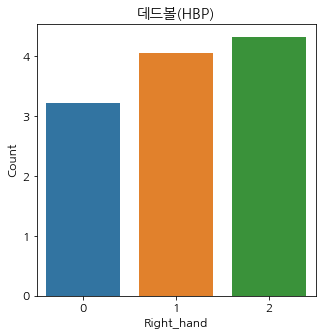

In [35]:
#시각화
plt.figure(figsize = (5,5))
plt.rc('font', size=12)
sns.barplot(x = [0,1,2], y =  hit_obp["HBP"])
plt.title("데드볼(HBP)")
plt.xlabel('Right_hand')
plt.ylabel('Count')
plt.show()

양손타자, 우타자가 평균적으로 데드볼을 가장 많이 맞았다. 좌타자는 비교적 데드볼 횟수가 적었다. 우투 투수들이 많아 공이 오른쪽으로 쏠리는 경향이 많고, 따라서 오른쪽 타석에 서야하는 우타자들이 공을 더 많이 맞는게 아닌가, 추측했다.